### For the same statistical areas, plot salary of postdocs and salary of everyone else

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.autonotebook import tqdm
from postdocsalary.paths import DATA_DIR, ensure_dir
import urllib.request
pd.set_option('display.max_columns', None)


<ipython-input-2-1570110eca21>:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
import matplotlib.font_manager
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Arial']})
#rc('text', usetex=True)

In [26]:
plt.rcParams['font.family'] = "sans-serif"
font = {'family' : 'sans-serif',
'weight' : 'normal',
'size' : 30
,'sans-serif':'Arial'}

In [27]:
matplotlib.matplotlib_fname()

'/home/AD/tsainbur/anaconda3/envs/postdoc/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'

In [28]:
university_df = pd.read_pickle(DATA_DIR/ 'university_ranking_salary.pickle')

In [29]:
university_df[:4]

,World Rank,Institution,Country,National Rank,Quality of Education Rank,Alumni Employment Rank,Quality of Faculty Rank,Research Performance Rank,Score,UNITID,INSTNM,IALIAS,ADDR,CITY,STABBR,ZIP,FIPS,OBEREG,CHFNM,CHFTITLE,GENTELE,EIN,DUNS,OPEID,OPEFLAG,WEBADDR,ADMINURL,FAIDURL,APPLURL,NPRICURL,VETURL,ATHURL,DISAURL,SECTOR,ICLEVEL,CONTROL,HLOFFER,UGOFFER,GROFFER,HDEGOFR1,DEGGRANT,HBCU,HOSPITAL,MEDICAL,TRIBAL,LOCALE,OPENPUBL,ACT,NEWID,DEATHYR,CLOSEDAT,CYACTIVE,POSTSEC,PSEFLAG,PSET4FLG,RPTMTH,INSTCAT,C18BASIC,C18IPUG,C18IPGRD,C18UGPRF,C18ENPRF,C18SZSET,C15BASIC,CCBASIC,CARNEGIE,LANDGRNT,INSTSIZE,F1SYSTYP,F1SYSNAM,F1SYSCOD,CBSA,CBSATYPE,CSA,NECTA,COUNTYCD,COUNTYNM,CNGDSTCD,LONGITUD,LATITUDE,DFRCGID,DFRCUSCG,LONGITUDE,CBSA_NAME,RPP_all,MEDIAN_SALARY,N_SALARIES,MEDIAN_SALARY_UPPER,MEDIAN_SALARY_LOWER,REAL_MEDIAN_SALARY,REAL_MEDIAN_SALARY_UPPER,REAL_MEDIAN_SALARY_LOWER
0,1.0,Harvard University,USA,1.0,1,1,1,1,100.0,166027.0,Harvard University,,Massachusetts Hall,Cambridge,MA,02138,25.0,1.0,Lawrence S. Bacow,President,6174951000,42103580.0,082359691|149617367|047006379,215500.0,1.0,www.harvard.edu/,college.harvard.edu/admissions,college.harvard.edu/financial-aid,college.harvard.edu/admissions/application-pro...,college.harvard.edu/financial-aid/net-price-ca...,sfs.harvard.edu/veteran-military-benefits,,accessibility.harvard.edu/,2.0,1.0,2.0,9.0,1.0,1.0,11.0,1.0,2.0,2.0,1.0,2.0,12.0,1.0,A,-2.0,-2.0,-2,1.0,1.0,1.0,1.0,1.0,2.0,15.0,8.0,14.0,14.0,6.0,17.0,15.0,15.0,15.0,2.0,5.0,2.0,-2,-2.0,14460,1,148,71650.0,25017,Middlesex County,2505.0,-71.118313,42.374471,96.0,1.0,-71.118313,"Boston-Cambridge-Newton, MA-NH",115.5,55783.941620,493,56164.312487,55205.642506,48297.784952,48627.110378,47797.093079
1,2.0,Massachusetts Institute of Technology,USA,2.0,4,12,2,8,96.7,166683.0,Massachusetts Institute of Technology,"MIT, M.I.T.",77 Massachusetts Avenue,Cambridge,MA,02139-4307,25.0,1.0,L. Rafael Reif,President,6172531000,42103594.0,001425594,217800.0,1.0,web.mit.edu/,https://mitadmissions.org/,https://sfs.mit.edu/,my.mit.edu/,https://sfs.mit.edu/undergraduate-students/our...,https://sfs.mit.edu/undergraduate-students/typ...,,studentlife.mit.edu/das,2.0,1.0,2.0,9.0,1.0,1.0,12.0,1.0,2.0,2.0,2.0,2.0,12.0,1.0,A,-2.0,-2.0,-2,1.0,1.0,1.0,1.0,1.0,2.0,15.0,14.0,15.0,14.0,6.0,17.0,15.0,15.0,15.0,1.0,4.0,2.0,-2,-2.0,14460,1,148,71650.0,25017,Middlesex County,2507.0,-71.093226,42.359243,96.0,1.0,-71.093226,"Boston-Cambridge-Newton, MA-NH",115.5,56659.816586,680,56952.349035,56164.312487,49056.118257,49309.393104,48627.110378
2,3.0,Stanford University,USA,3.0,10,4,3,2,95.1,243744.0,Stanford University,,,Stanford,CA,94305,6.0,8.0,Marc Tessier-Lavigne,President,6507232300,941156365.0,009214214,130500.0,1.0,www.stanford.edu/,admission.stanford.edu/,financialaid.stanford.edu/,commonapp.org/,www.stanford.edu/dept/finaid/undergrad/how/cal...,exploredegrees.stanford.edu/veterans/,parents.stanford.edu/2015/11/09/stanford-athle...,diversityandaccess.stanford.edu/disability-access,2.0,1.0,2.0,9.0,1.0,1.0,11.0,1.0,2.0,1.0,1.0,2.0,21.0,1.0,A,-2.0,-2.0,-2,1.0,1.0,1.0,1.0,1.0,2.0,15.0,11.0,14.0,14.0,6.0,17.0,15.0,15.0,15.0,2.0,4.0,2.0,-2,-2.0,41940,1,488,-2.0,6085,Santa Clara County,618.0,-122.167359,37.429434,96.0,1.0,-122.167359,"San Jose-Sunnyvale-Santa Clara, CA",126.7,62476.603840,349,63319.925605,62352.688787,49310.658122,49976.263303,49212.856186
3,6.0,Princeton University,USA,4.0,5,15,7,70,92.6,186131.0,Princeton University,,1 Nassau Hall,Princeton,NJ,08544-0070,34.0,2.0,Christopher L. Eisgruber,President,6092583000,210634501.0,002484665,262700.0,1.0,www.princeton.edu/,,,,www.princeton.edu/admission/financialaid/estim...,registrar.princeton.edu/student-services/veter...,fs.ncaa.org/Docs/newmedia/public/rates/index.html,www.princeton.edu/ods/,2.0,1.0,2.0,9.0,1.0,1.0,12.0,1.0,2.0,2.0,2.0,2.0,13.0,1.0,A,-2.0,-2.0,-2,1.0,1.0,1.0,1.0,1.0,2.0,15.0,11.0,15.0,14.0,5.0,14.0,15.0,15.0,15.0,2.0,3.0,2.0,-2,-2.0,45940,1,408,-2.0,34021,Mercer County,3412.0,-74.659365,40.348732,96

### Threshold number of salaries

In [30]:
university_df.N_SALARIES.sum()

28260

In [31]:
MIN_N_SALARIES = 25

In [32]:
np.sum(university_df.N_SALARIES > MIN_N_SALARIES)

131

In [33]:
# 
university_df = university_df[university_df.N_SALARIES > MIN_N_SALARIES]

In [34]:
university_df.N_SALARIES.sum()

27652

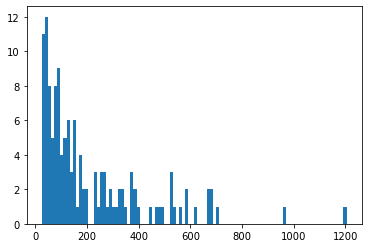

In [35]:
plt.hist(university_df.N_SALARIES, bins = 100);

In [36]:
np.sum(university_df.N_SALARIES)

27652

### Compare median real salary in same regions as median postdoc salary

In [37]:
import seaborn as sns

In [38]:
median_salary_by_area = pd.read_pickle(DATA_DIR/ 'median_salary_by_area.pickle')

In [39]:
median_salary_by_area[:3]

,AREA,AREA_TITLE,median_annual,mean_annual,RPP,GeoFips,mean_scaled,median_scaled
0,10180,"Abilene, TX",34130.0,42930.0,90.3,10180,47541.528239,37796.234773
1,10420,"Akron, OH",40440.0,51220.0,90.0,10420,56911.111111,44933.333333
2,10500,"Albany, GA",32810.0,45060.0,82.8,10500,54420.289855,39625.603865


In [40]:
university_df = university_df.merge(
    median_salary_by_area[["GeoFips", "median_scaled", "mean_scaled", "median_annual","mean_annual"	]],
    how="left",
    left_on="CBSA",
    right_on="GeoFips",
)

In [41]:
pal = sns.color_palette('Set1')
pal

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6)]

In [42]:
from postdocsalary.paths import save_fig, FIGURE_DIR

### Salary postdoc vs others

In [43]:
s = 10
alpha = .25
lw=4

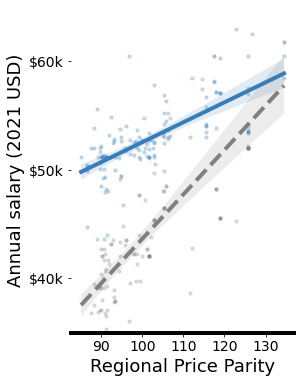

In [44]:
fig, ax = plt.subplots(figsize=(4,6))
#

sns.regplot(
    x="RPP_all",
    y="MEDIAN_SALARY",
    data=university_df,
    ax=ax,
    color = pal[1],
    scatter_kws={
        "alpha": alpha,
        "s": s,
    },
    line_kws = {
        'lw':lw,
        
    }
)
sns.regplot(
    x="RPP_all",
    y="median_annual",
    data=university_df,
    ax=ax,
    color="grey",
    scatter_kws={
        "alpha": alpha,
        "s": s,
    },
    line_kws = {
        'lw':lw,
        'ls': 'dashed'
    }
)

ax.set_ylim([35000, 65000])
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(4)
ax.spines['left'].set_linewidth(0)
ax.set_xticks([90, 100, 110, 120, 130])
ax.set_xlabel('Regional Price Parity', fontsize=18)
ax.set_ylabel('Annual salary (2021 USD)', fontsize=18)
ax.set_yticks([40000, 50000, 60000])
ax.set_yticklabels(['$40k', '$50k', '$60k'], fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)

save_fig(FIGURE_DIR / 'salary_postdoc_vs_median')

### Real Salary Postdoc vs others

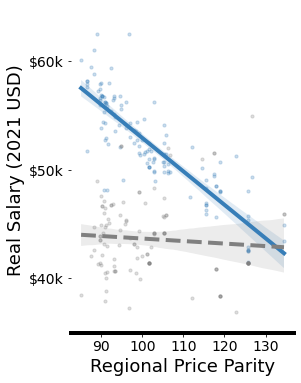

In [45]:
fig, ax = plt.subplots(figsize=(4,6))
sns.regplot(
    x="RPP_all",
    y="REAL_MEDIAN_SALARY",
    data=university_df,
    ax=ax,
    color = pal[1],
    scatter_kws={
        "alpha": alpha,
        "s": s,
    },
    line_kws = {
        'lw':lw,
        
    }
)
sns.regplot(
    x="RPP_all",
    y="median_scaled",
    data=university_df,
    ax=ax,
    color="grey",
    scatter_kws={
        "alpha": alpha,
        "s": s,
    },
    line_kws = {
        'lw':lw,
        'ls': 'dashed'
    }
)

ax.set_ylim([35000, 65000])
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(4)
ax.spines['left'].set_linewidth(0)
ax.set_xticks([90, 100, 110, 120, 130])
ax.set_xlabel('Regional Price Parity', fontsize=18)
ax.set_ylabel('Real Salary (2021 USD)', fontsize=18)
ax.set_yticks([40000, 50000, 60000])
ax.set_yticklabels(['$40k', '$50k', '$60k'], fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)

save_fig(FIGURE_DIR / 'real_salary_postdoc_vs_median')